# CS4168 Data Mining

Aoife Kennedy (20267746)

Lab 3 - Clustering and Manifold Learning 

# A. Import Python Modules and Dataset

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn.manifold import TSNE
from sklearn import cluster #needed for k-Means clustering
from sklearn.cluster import KMeans
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]
from sklearn.metrics import silhouette_score

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
path = "/content/drive/MyDrive/loans_train_prepared.csv"
df = pd.read_csv(path)

In [12]:
data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (614, 17)


# B. Rescale the Data

In [13]:
min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(data)

# C. Scatterplot Function

In [14]:
colors = np.array(['orange', 'blue', 'lime', 'yellow', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):


    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1],
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

# D. K-Means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

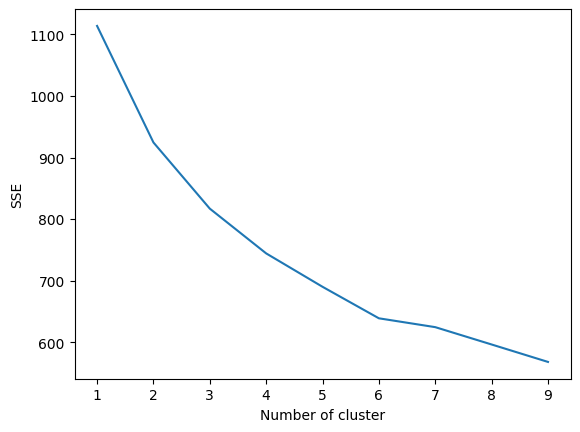

In [17]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    df["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

The SSE falls with an increase in the number of clusters. The "elbow" is the point at which the SSE declines at a slower rate. At this time, the total SSE is not greatly decreased by adding more clusters. That is at 6 clusters (k=6) in this graph. The elbow is not very noticeable, but the SSE declines quite slowly (about 630 to 580 SSE) between k=6 and k=9.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

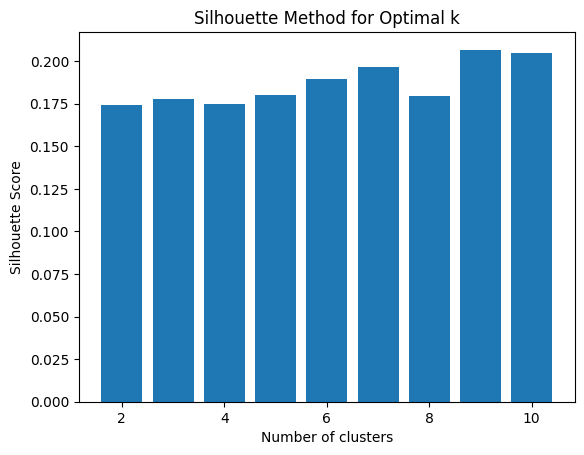

In [19]:
# To store silhouette scores for different cluster numbers
silhouette_scores = {}

# Iterate over different cluster numbers
for k in range(2, 11):
    # Perform KMeans clustering using the KMeans algorithm
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=42).fit(data)

    # Calculate silhouette score and store in the dictionary
    silhouette_scores[k] = silhouette_score(data, kmeans.labels_)

# Plotting the Silhouette Method
plt.figure()
plt.bar(list(silhouette_scores.keys()), list(silhouette_scores.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method for Optimal k")
plt.show()

The Silhouette Method assesses the quality of clustering based on how distinct and well-separated the clusters are, as opposed to the Elbow Method. The Silhouette Score calculates an object's cohesiveness (similarity to its own cluster) and detachment (from other clusters) from each other. Better-defined clusters are indicated by a higher Silhouette Score.

Looking at the Silhouette Scores for various choices of k, k=6 is clearly a good option. While k=7, k=9, and k=10 exhibit marginally higher scores, k=6 is a well-balanced choice due to its ease of use and interpretability. This equilibrium maintains a reasonable degree of separation between clusters without adding needless complexity.

Therefore, **k=6** stands out as a solid and sensible option for clustering the data based on both the Elbow and Silhouette approaches.

In [20]:
k = 6

# E. Apply a manifold-learning technique to project the data set to a 2D space

In [21]:
# Perform KMeans clustering using the optimal value of k
kmeans_optimal = KMeans(n_clusters = k, max_iter = 1000, random_state = 42).fit(data)

# Append the cluster centers to the dataset
data_and_centers = np.r_[data, kmeans_optimal.cluster_centers_]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# E1. Apply multi-dimensional scaling (MDS) to project both the data and the k-Means cluster centers to a 2D space

In [22]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("Transformation complete")

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Transformation complete


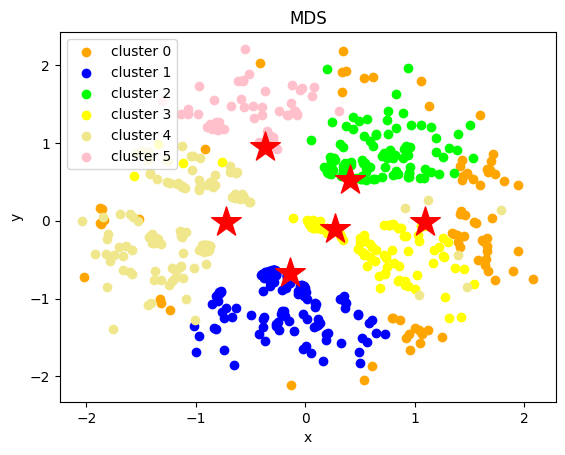

In [23]:
clustering_scatterplot(points = XYcoordinates[:-k,:],
                       labels = kmeans_optimal.labels_,
                       centers = XYcoordinates[-k:,:],
                       title = 'MDS')

# E2. Apply t-SNE to project both the data and the k-Means cluster centers to a 2D space

In [26]:
tsne_coordinates = TSNE(n_components=2).fit_transform(data_and_centers)
print("t-SNE Transformation complete")

t-SNE Transformation complete


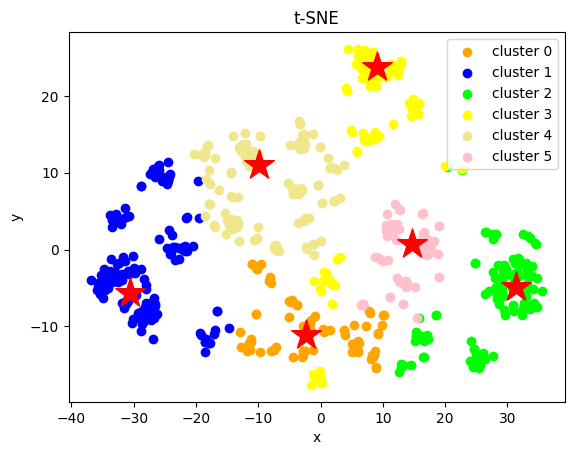

In [27]:
clustering_scatterplot(points = tsne_coordinates[:-k, :],
                       labels = kmeans_optimal.labels_,
                       centers = tsne_coordinates[-k:, :],
                       title = 't-SNE')

# F. Cluster Analysis

In [28]:
df['cluster'] = pd.Series(kmeans_optimal.labels_, index = df.index)

In [29]:
df.head()

,Unnamed: 0,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,clusters,cluster
0,0,0.000000,1.082952,1.056390,0.75,1.0,1,0,0,0,0,0,0,0,1,1,0.841086,0,5
1,1,0.333333,0.924041,1.045549,0.75,1.0,1,0,1,0,0,0,0,0,0,0,0.871711,7,3
2,2,0.000000,0.681512,0.633249,0.75,1.0,1,0,1,0,1,0,0,0,1,1,0.385189,4,2
3,3,0.000000,0.606463,1.000974,0.75,1.0,1,0,1,0,0,0,1,0,1,1,0.717012,4,2
4,4,0.000000,1.100325,1.113997,0.75,1.0,1,0,0,0,0,0,0,0,1,1,0.860305,0,5


In [30]:
df.tail()

,Unnamed: 0,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,clusters,cluster
609,609,0.000000,0.664021,0.673577,0.750,1.0,0,0,0,0,0,0,0,0,0,1,0.364708,3,4
610,610,1.000000,0.856946,0.392461,0.375,1.0,1,0,1,0,0,0,0,0,0,1,0.587496,7,3
611,611,0.333333,1.312470,1.565057,0.750,1.0,1,0,1,0,0,0,0,0,1,1,1.116075,4,2
612,612,0.666667,1.266308,1.324336,0.750,1.0,1,0,1,0,0,0,0,0,1,1,1.042256,4,2
613,613,0.000000,0.924041,1.072433,0.750,0.0,0,0,0,0,1,0,0,1,0,0,0.663523,2,0


In [31]:
df.groupby('cluster').mean()

,Unnamed: 0,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,clusters
cluster,,,,,,,,,,,,,,,,,,
0,325.474359,0.282051,0.887329,1.076580,0.716346,0.000000,0.807692,0.038462,0.679487,0.000000,0.153846,0.012821,0.320513,0.333333,0.333333,0.000000,0.832865,3.282051
1,297.266667,0.308642,0.920574,1.117656,0.720741,0.985185,0.844444,0.014815,1.000000,0.000000,0.133333,0.029630,0.177778,1.000000,0.000000,0.896296,0.899543,2.000000
2,270.285714,0.360119,0.940892,1.103440,0.679241,0.991071,0.955357,0.017857,1.000000,0.000000,0.107143,0.062500,0.196429,0.000000,1.000000,0.821429,0.905617,4.089286
3,349.103093,0.323024,0.934219,1.139000,0.704639,0.989691,0.927835,0.030928,1.000000,0.000000,0.164948,0.061856,0.247423,0.000000,0.000000,0.742268,0.926375,6.422680
4,321.648438,0.104167,0.925255,1.028666,0.735547,0.976562,0.609375,0.015625,0.000000,0.015625,0.132812,0.070312,0.257812,0.562500,0.000000,0.750000,0.814118,5.335938
5,271.359375,0.057292,0.838149,0.923321,0.722656,0.937500,0.578125,0.015625,0.015625,0.015625,0.109375,0.078125,0.093750,0.000000,1.000000,0.640625,0.746760,0.375000
